# $$\text{Financial Data Analytics}$$

## III. Time series forecasting

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
jnj = pd.read_csv("../artifacts/jnj/jnj_data.csv", index_col='Date', parse_dates=True)
lly = pd.read_csv("../artifacts/lly/lly_data.csv", index_col='Date', parse_dates=True)
unh = pd.read_csv("../artifacts/unh/unh_data.csv", index_col='Date', parse_dates=True)
mrk = pd.read_csv("../artifacts/mrk/mrk_data.csv", index_col='Date', parse_dates=True)

In [3]:
jnj.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,149.750000,150.000000,148.639999,148.869995,132.683792,8651700
2020-02-03,149.419998,150.490005,149.240005,150.169998,133.842468,5765200
2020-02-04,151.490005,152.750000,151.199997,151.600006,135.116989,6541400
2020-02-05,151.720001,154.020004,151.309998,153.990005,137.247086,5979900
2020-02-06,154.250000,154.500000,152.740005,153.529999,136.837143,6201200


<Axes: title={'center': 'JNJ Close Price'}, xlabel='Date', ylabel='Close'>

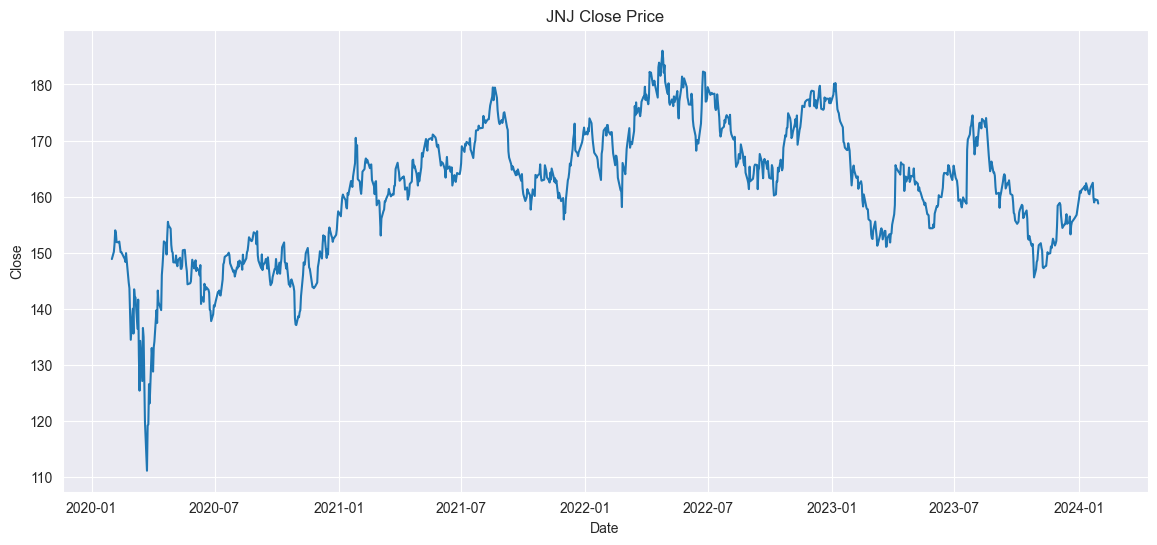

In [4]:
plt.rcParams['figure.figsize'] = (14,6)
sns.set_style("darkgrid")
plt.title("JNJ Close Price")
sns.lineplot(x="Date", y='Close', data=jnj)

We'll plot the same for other graphs

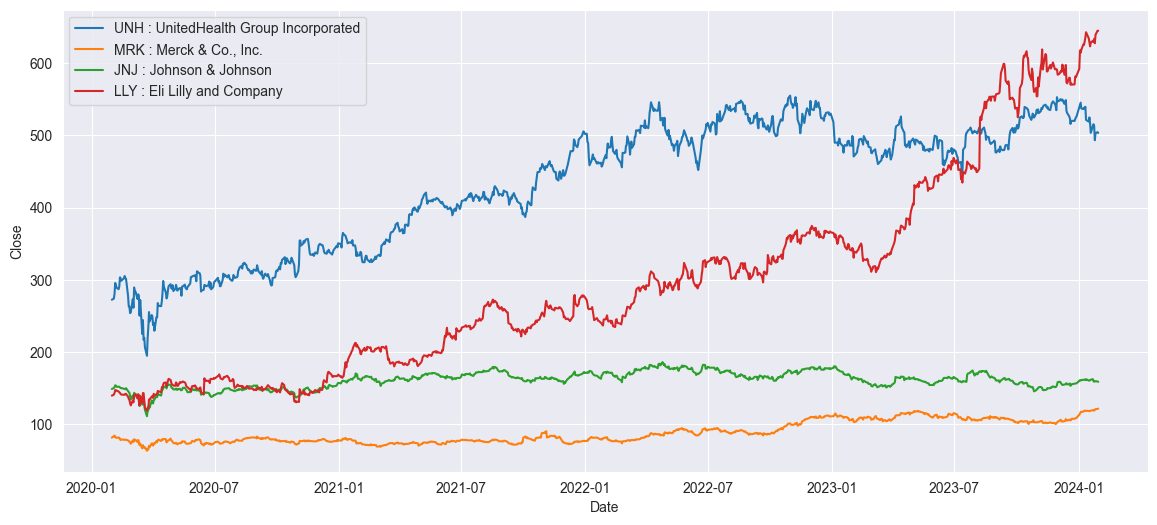

In [5]:
df_dict = {"UNH : UnitedHealth Group Incorporated": unh, 
           "MRK : Merck & Co., Inc.": mrk,
           "JNJ : Johnson & Johnson": jnj,
           "LLY : Eli Lilly and Company": lly}
for name, data in df_dict.items():
    sns.lineplot(x="Date", y='Close', data=data, label=name)

- UNH (United Health Group Incorporated), represented by the blue line, has seen a steady upward trend in its stock price, starting from around $280 in early 2020 and rising to nearly $600 by early 2024. This indicates a consistently strong performance and growth for the company during this period.

- LLY (Eli Lilly and Company), depicted by the red line, has experienced the most significant growth among the four companies. Starting from around $140 in early 2020, its stock price has skyrocketed to over $500 by early 2024, indicating remarkable success and investor confidence in the company's performance.

- MRK (Merck & Co., Inc.), represented by the orange line, has remained relatively flat and stable, fluctuating between $70 and $120 throughout the time period shown. This suggests a more steady and consistent performance without major ups or downs.

- JNJ (Johnson & Johnson), represented by the green line, has also shown a gradual upward trend, starting from around $130 in early 2020 and reaching over $180 by early 2024. However, its growth has been more modest compared to UNH.

For better trend visibility, we'll plot both MRK and JNJ close prices in a separate graph.

<Axes: xlabel='Date', ylabel='Close'>

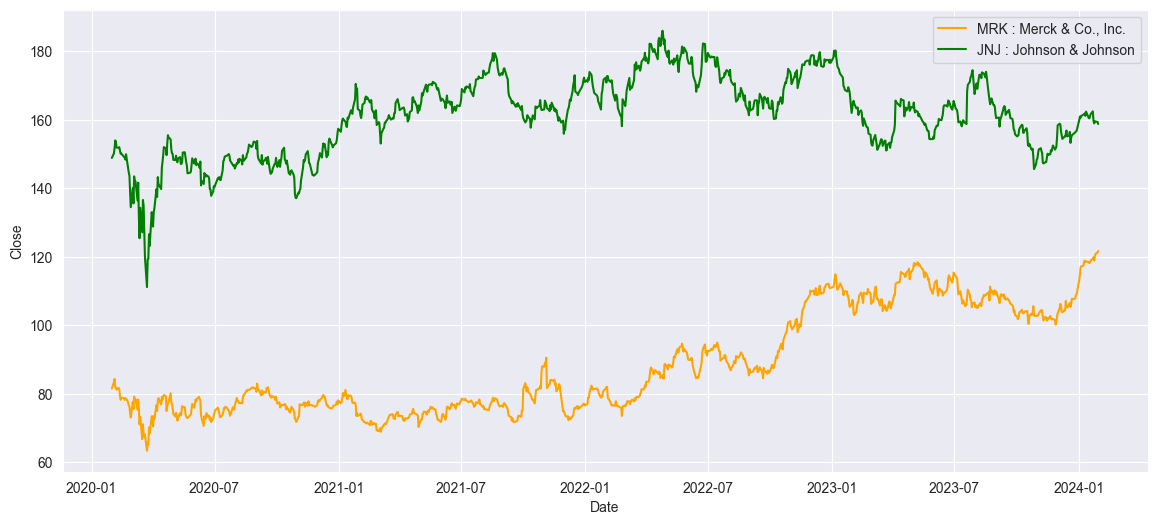

In [6]:
sns.lineplot(x="Date", y='Close', data=mrk, label="MRK : Merck & Co., Inc.", color="orange")
sns.lineplot(x="Date", y='Close', data=jnj, label="JNJ : Johnson & Johnson", color="green")


This graph displays the closing stock price trends for Merck & Co., Inc. (MRK) and Johnson & Johnson (JNJ), over the past few years.

Focusing on Merck (green line), we can observe that their stock price started around $90 in early 2020 and has exhibited a cyclical pattern with ups and downs throughout the time period shown. The price reached its lowest point around $70 in mid-2020 and peaked around $115 in late 2022. Overall, Merck's stock has maintained a relatively stable range between $70 and $115 during this timeframe.

On the other hand, Johnson & Johnson's stock (orange line) has demonstrated a more consistent upward trajectory. Starting from around $140 in early 2020, their stock price dipped to around $120 mid-year but has since recovered and continued to rise, reaching over $170 by early 2024. While there have been some fluctuations along the way, JNJ's overall trend has been positive and indicative of steady growth.

We'll be answering the following questions along the way:
```
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks'?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price using LSTM)
```

In [7]:
jnj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-31 to 2024-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


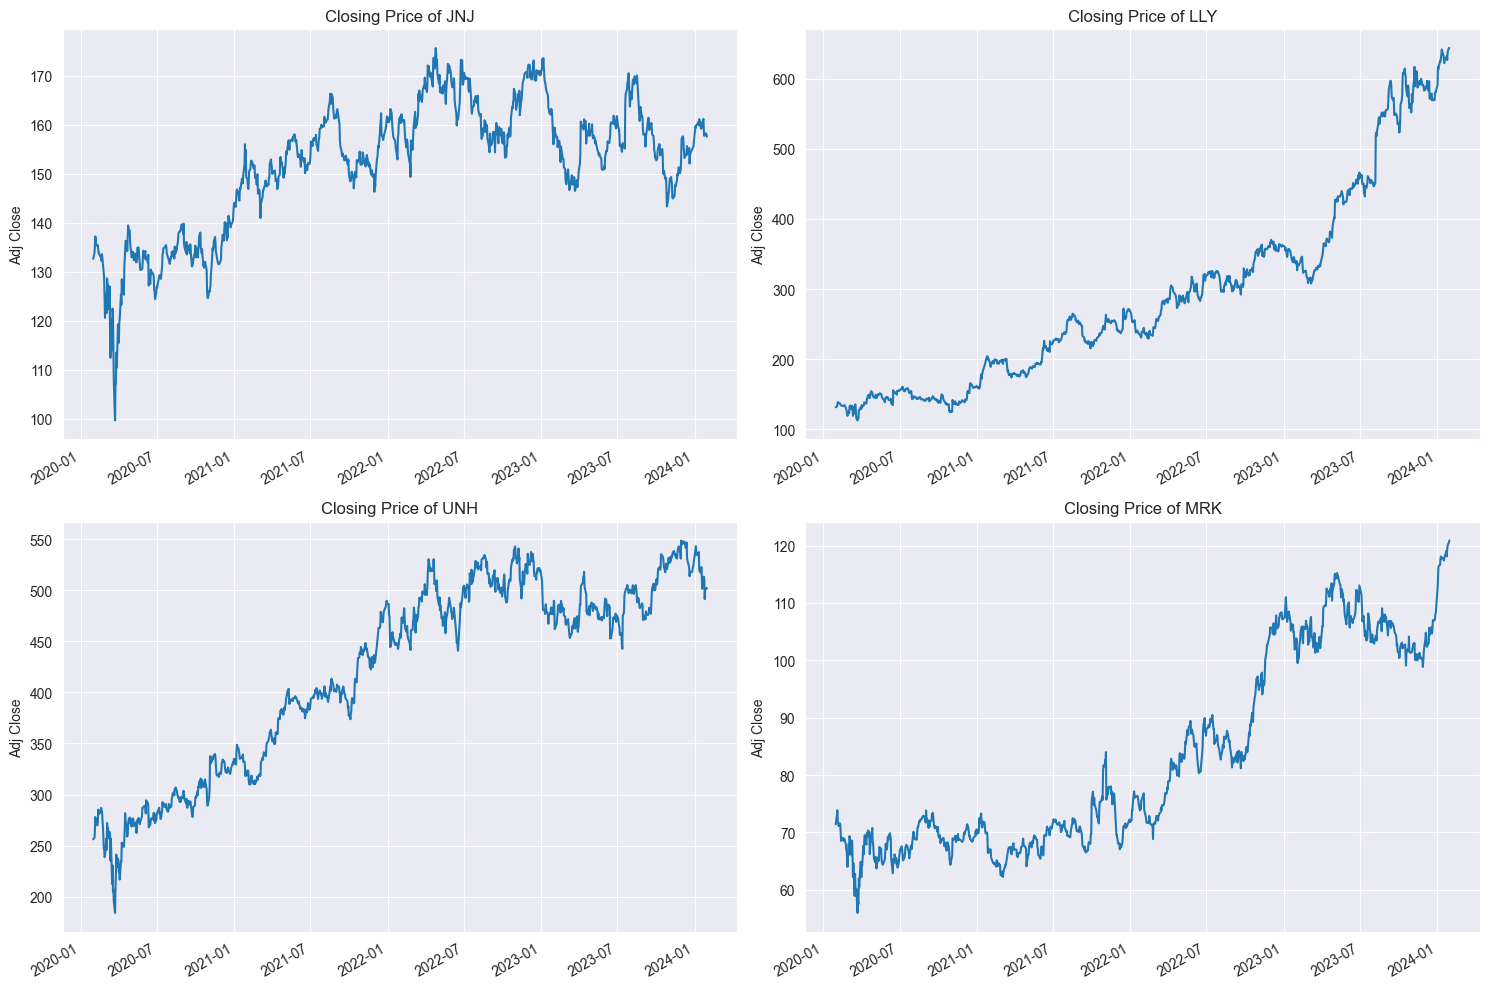

In [8]:
# Let's see a historical view of the closing price
company_list = [jnj, lly, unh, mrk]
company_name = ["JNJ", "LLY", "UNH", "MRK"]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

#### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.


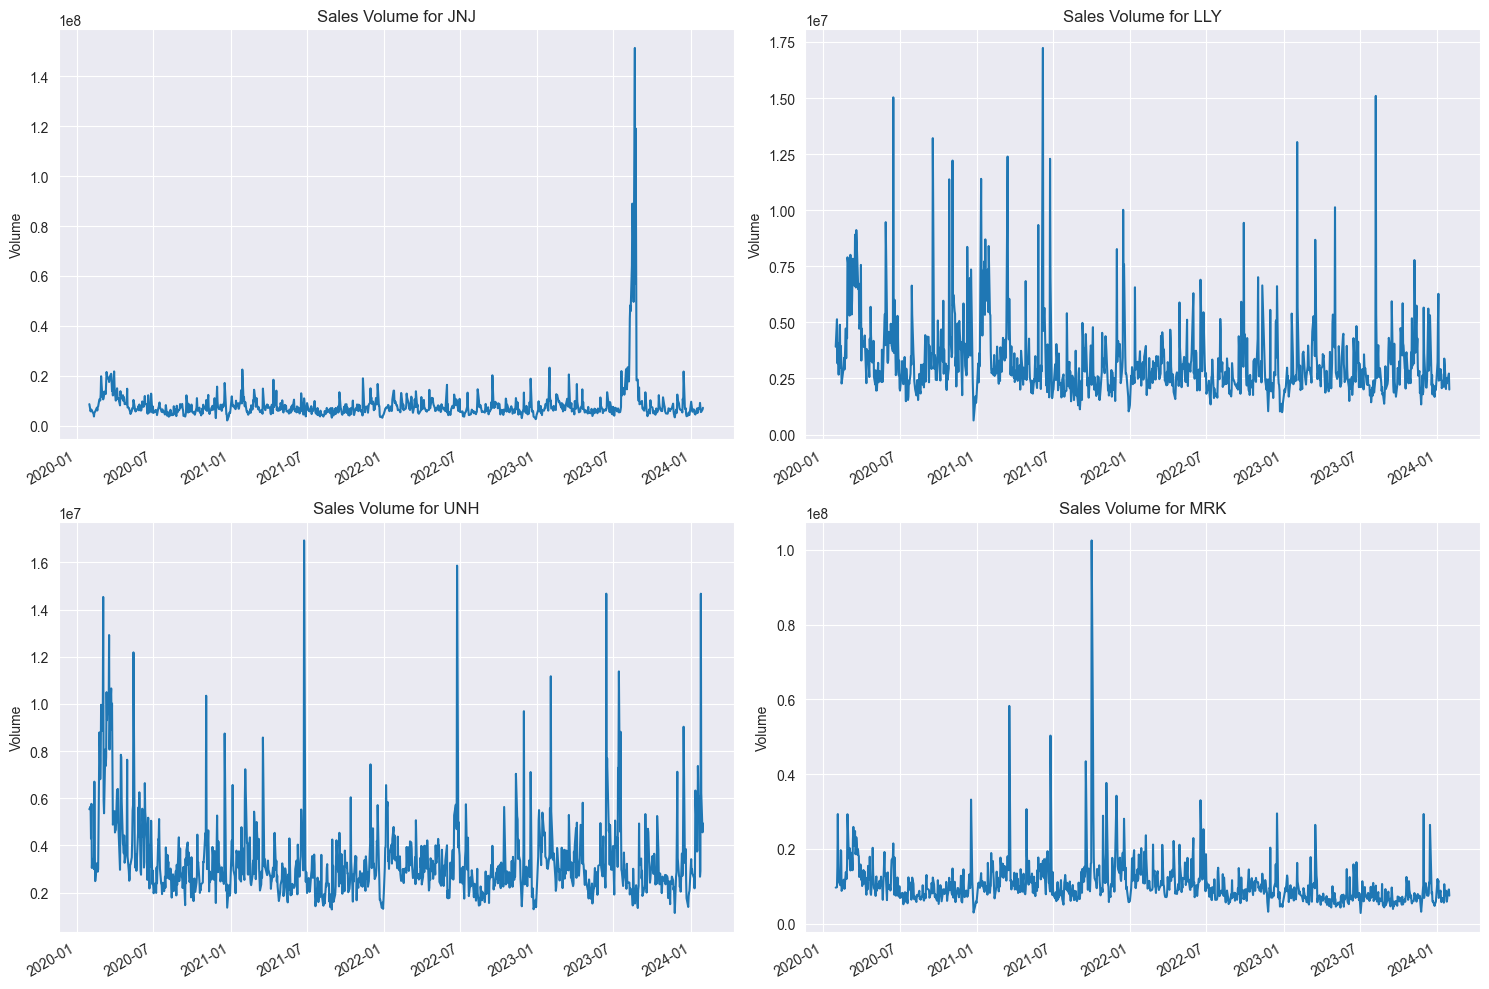

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

#### Moving average of the various stocks
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

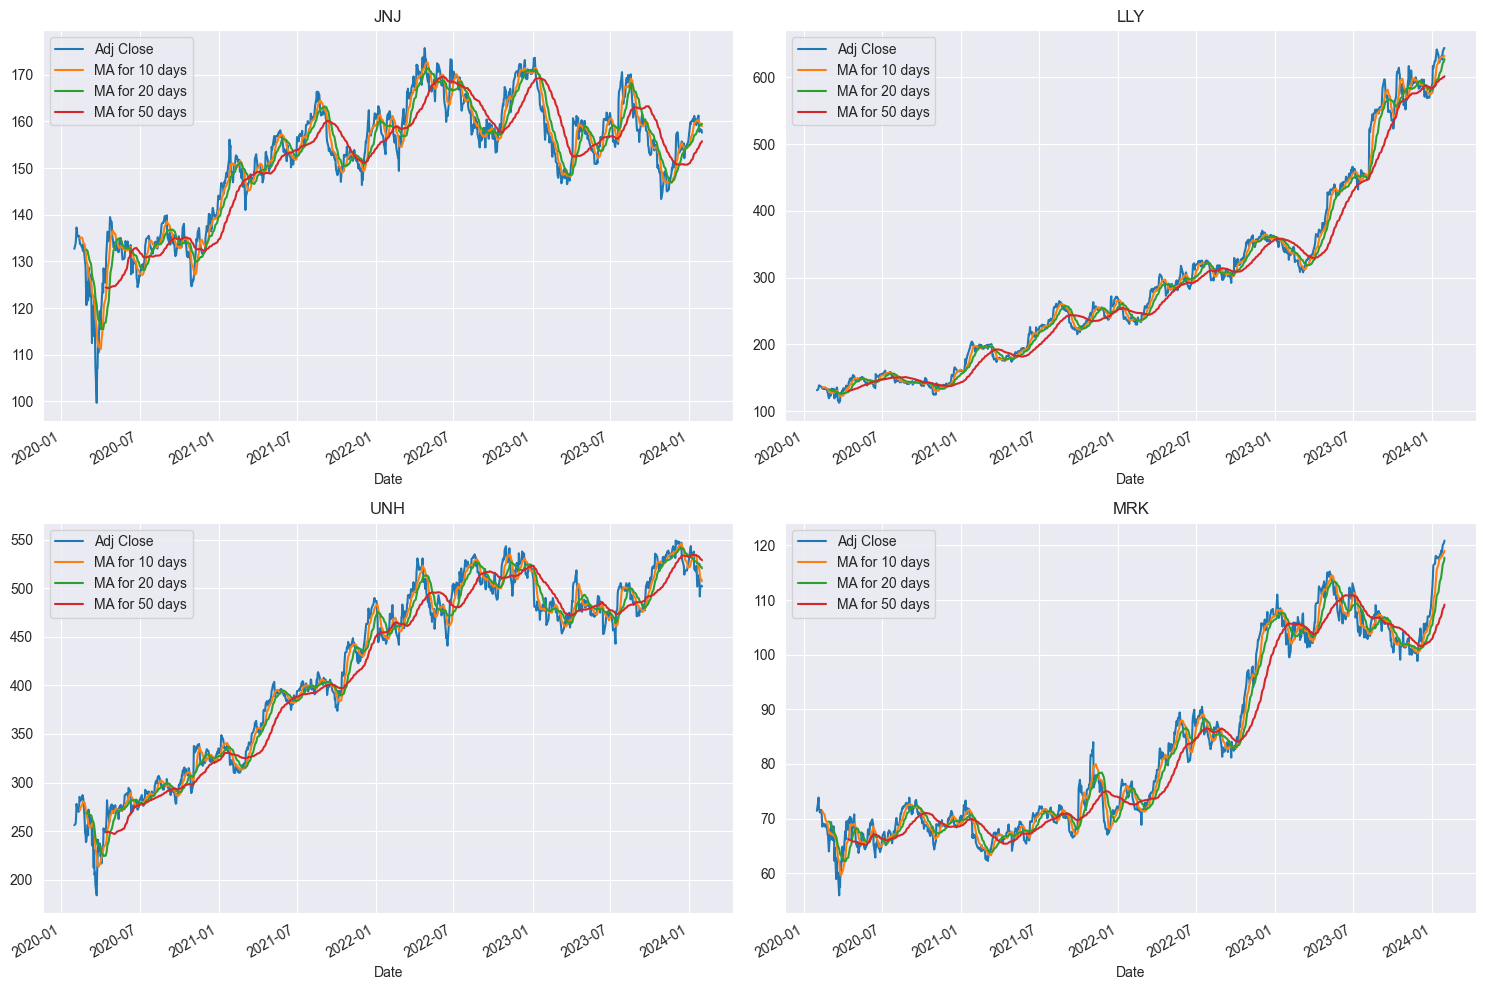

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

jnj[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('JNJ')

lly[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('LLY')

unh[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('UNH')

mrk[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('MRK')

fig.tight_layout()

#### Average Daily return of stock on average

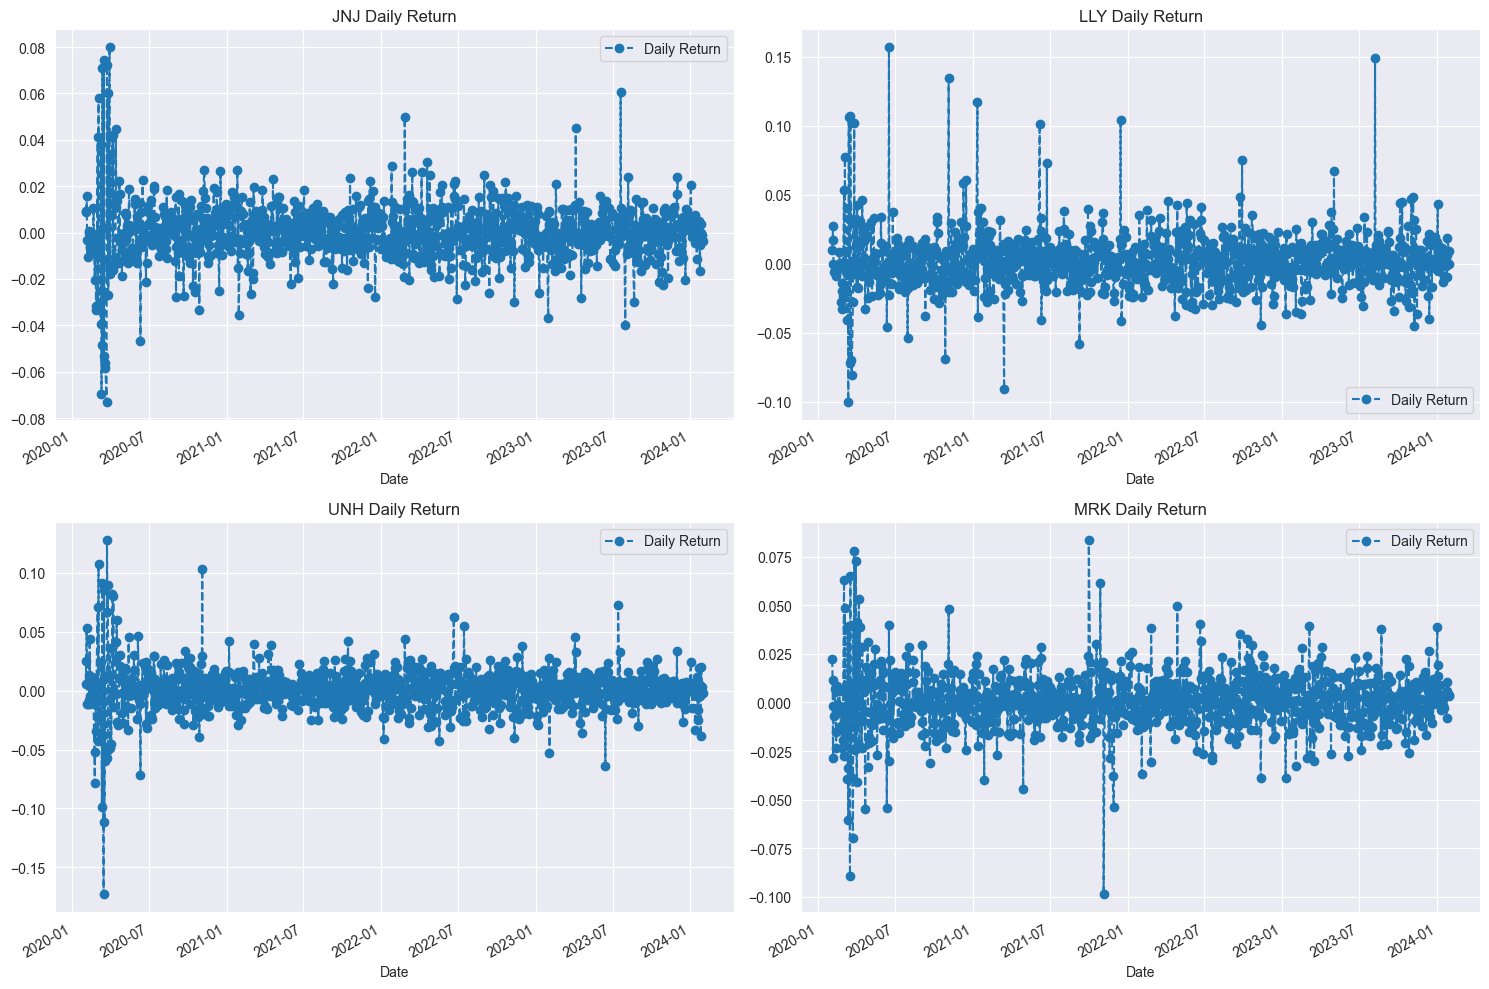

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

jnj['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('JNJ Daily Return')

lly['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('LLY Daily Return')

unh['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('UNH Daily Return')

mrk['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('MRK Daily Return')

fig.tight_layout()

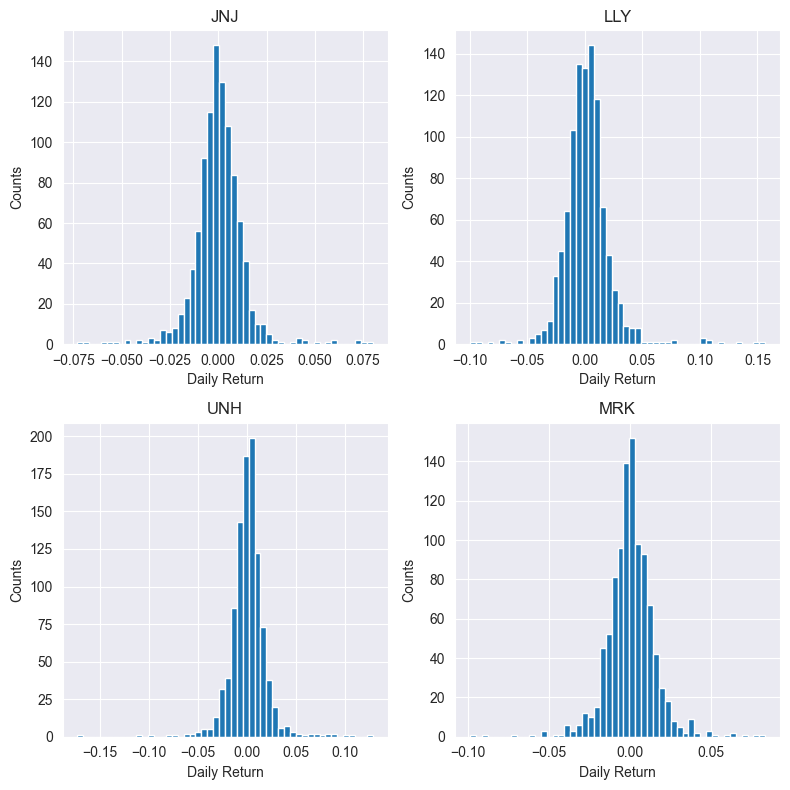

In [13]:
plt.figure(figsize=(8, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

### Forecasting closing price of the stocks
We'll try to predict closing price of UNH stock first.

In [16]:
# Create a new dataframe with only the 'Close column 
data = unh.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

805

In [17]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.21535432],
       [0.21971185],
       [0.23864107],
       ...,
       [0.85581057],
       [0.85952979],
       [0.85694847]])

In [19]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.21535432, 0.21971185, 0.23864107, 0.27996892, 0.27089285,
       0.26190012, 0.25582168, 0.26625774, 0.30147937, 0.29792668,
       0.28843429, 0.29776016, 0.30655858, 0.29773237, 0.29578946,
       0.2301757 , 0.19020791, 0.18912541, 0.16392349, 0.16681008,
       0.2171861 , 0.18468453, 0.26245526, 0.2445252 , 0.24705096,
       0.21810208, 0.23630962, 0.23014792, 0.15418135, 0.21421633,
       0.08376583, 0.13700074, 0.06161702, 0.06922202, 0.03255709,
       0.        , 0.06922202, 0.10999473, 0.16800354, 0.13208802,
       0.15659606, 0.15132255, 0.11784952, 0.1265092 , 0.09611702,
       0.14843596, 0.14760329, 0.20253124, 0.19226179, 0.19054097,
       0.20994198, 0.24097251, 0.28746284, 0.26561934, 0.24224932,
       0.22018373, 0.22803848, 0.25110322, 0.26764551, 0.27511173])]
[0.2595131104494598]

[array([0.21535432, 0.21971185, 0.23864107, 0.27996892, 0.27089285,
       0.26190012, 0.25582168, 0.26625774, 0.30147937, 0.29792668,
       0.28843429, 0.29776016, 0.306

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3


745/745 [==============================] - 32s 34ms/step - loss: 0.0029
Epoch 2/3
745/745 [==============================] - 26s 35ms/step - loss: 0.0014
Epoch 3/3
745/745 [==============================] - 24s 33ms/step - loss: 0.0012


In [30]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7/7 [==============================] - 2s 38ms/step


8.835761613763399

C:\Users\yassi\AppData\Local\Temp\ipykernel_19620\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


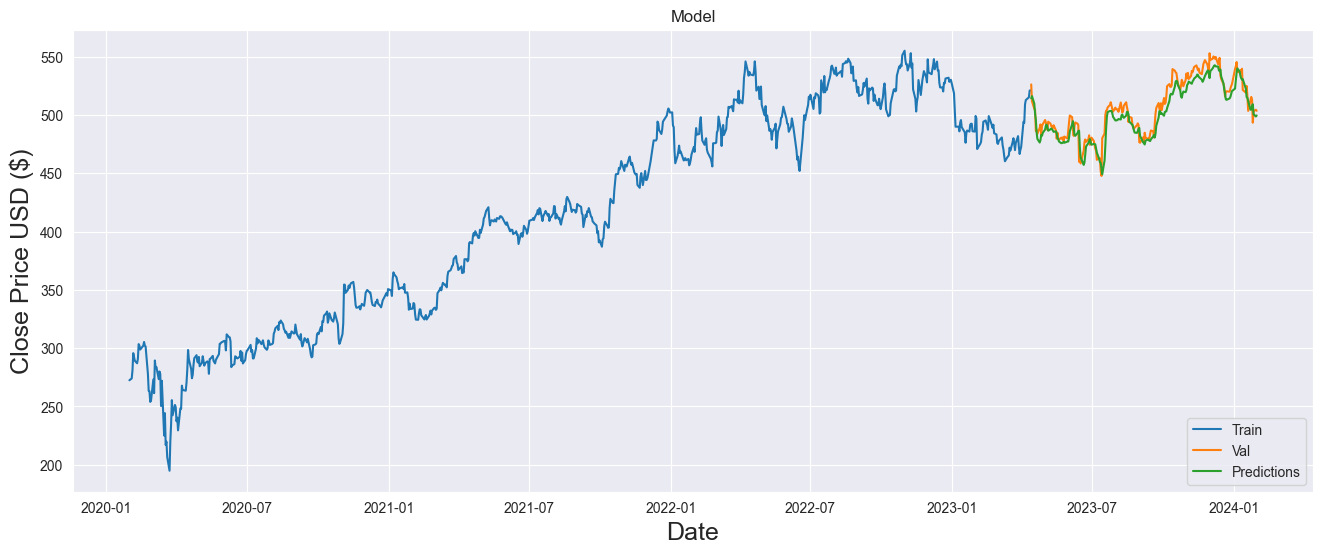

In [31]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
valid.head()

,Close,Predictions
Date,,
2023-04-13,526.229980,514.305664
2023-04-14,511.790009,516.164001
2023-04-17,505.350006,509.805847
2023-04-18,504.480011,501.337006
2023-04-19,486.200012,495.830048


We can repeat the same process for the other stock prices.

c:\Users\yassi\PycharmProjects\financial_data_analysis\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 7.76


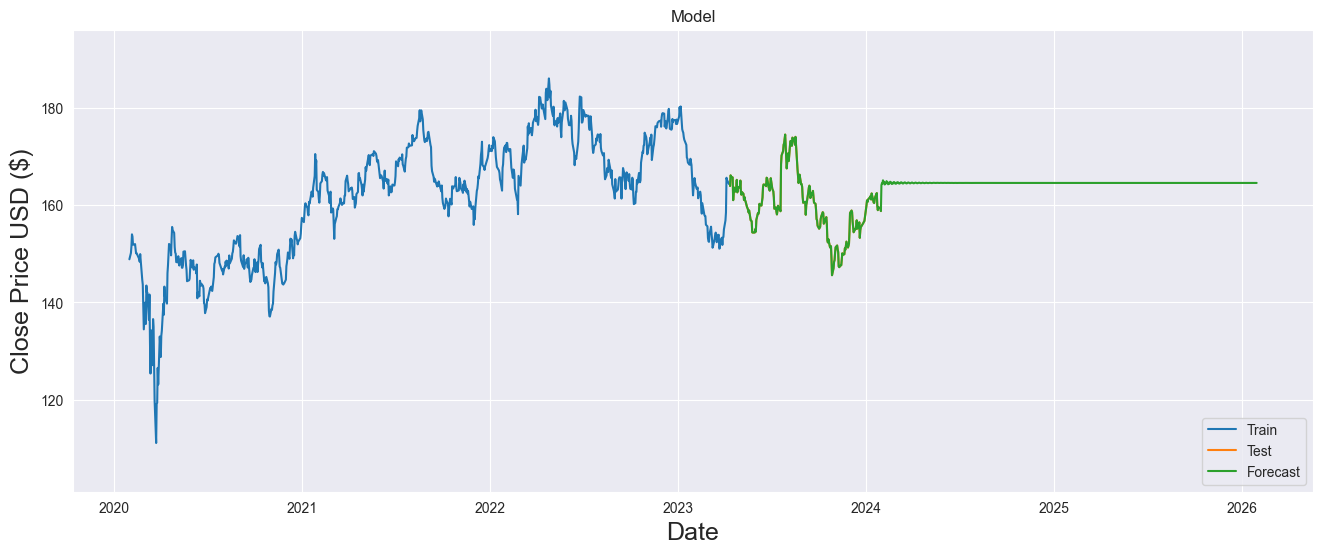

In [46]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error

train_data_len = int(len(jnj) * 0.8)  # Use 80% of the data for training
 

# Prepare data
train_data = jnj['Close'][:train_data_len]
test_data = jnj['Close'][train_data_len:]

# Fit ARIMA model
model = pm.auto_arima(train_data, seasonal=False, trace=False)

# Forecast for the next 2 years (assuming daily data)
forecast_periods = 2 * 365
forecasts = model.predict(n_periods=forecast_periods)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecasts[:len(test_data)]))
print(f'RMSE: {rmse:.2f}')

# Create a new index for forecasts
new_index = test_data.index.append(pd.date_range(test_data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D'))

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(new_index, np.concatenate([test_data.values, forecasts]), label='Forecast')
plt.legend(['Train', 'Test', 'Forecast'], loc='lower right')

# Adjust y-axis limits
all_data = np.concatenate([train_data.values, test_data.values, forecasts])
plt.ylim(np.min(all_data) - 10, np.max(all_data) + 10)

plt.show()



<Axes: >

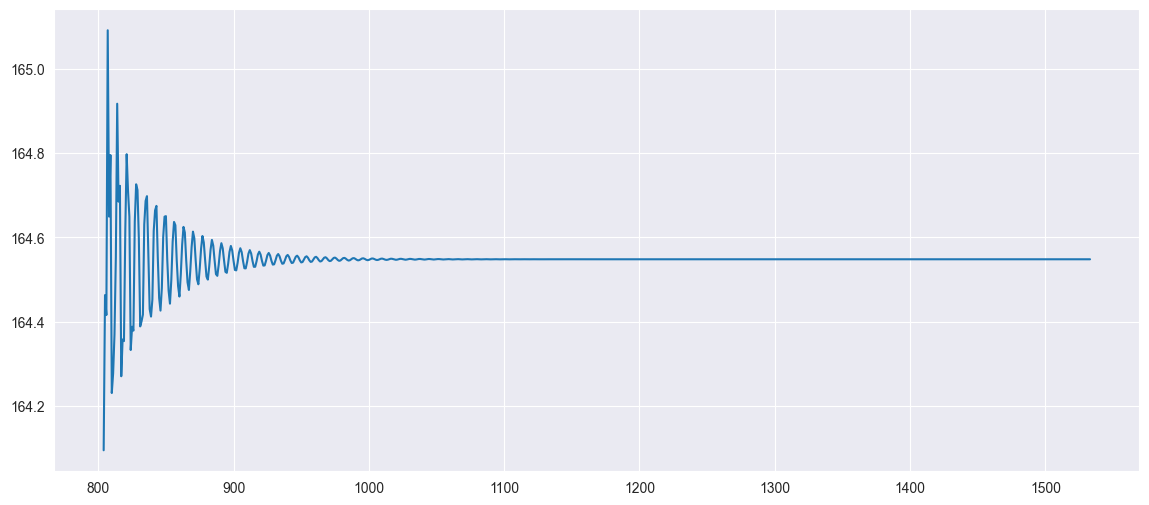

In [45]:
sns.lineplot(forecasts)

As you can see, using ARIMA method, we couldn't get a good long-term forecasting, that's why many research papers suggest performing analysis on a short period of time. LSTM is preferrable (the first method we've used.)